<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_dqn_evaluation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-9' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config

In [2]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


In [3]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,255 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Get:13 http://archive.ub

In [4]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [5]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [6]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 162.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 63.0 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [7]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [8]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0


import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


In [9]:
# Install all required packages
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance --quiet
!pip install stable-baselines3[extra] --quiet


Mounted at /content/drive
Using device: cpu

Training AAPL
Saved model: ./dqn_walkforward_models/dqn_AAPL_2023-06-01_to_2025-04-28.pth | Return: 56.03%

Training TSLA
Saved model: ./dqn_walkforward_models/dqn_TSLA_2023-06-01_to_2025-04-28.pth | Return: 275.76%

Training MSFT
Saved model: ./dqn_walkforward_models/dqn_MSFT_2023-06-01_to_2025-04-28.pth | Return: -23.63%

Training GOOG
Saved model: ./dqn_walkforward_models/dqn_GOOG_2023-06-01_to_2025-04-28.pth | Return: -17.84%

Training AMZN
Saved model: ./dqn_walkforward_models/dqn_AMZN_2023-06-01_to_2025-04-28.pth | Return: 22.40%

Training NVDA
Saved model: ./dqn_walkforward_models/dqn_NVDA_2023-06-01_to_2025-04-28.pth | Return: 1.37%

Training META
Saved model: ./dqn_walkforward_models/dqn_META_2023-06-01_to_2025-04-28.pth | Return: 38.63%

Training JPM
Saved model: ./dqn_walkforward_models/dqn_JPM_2023-06-01_to_2025-04-28.pth | Return: 60.02%

Training BAC
Saved model: ./dqn_walkforward_models/dqn_BAC_2023-06-01_to_2025-04-28.pth | R

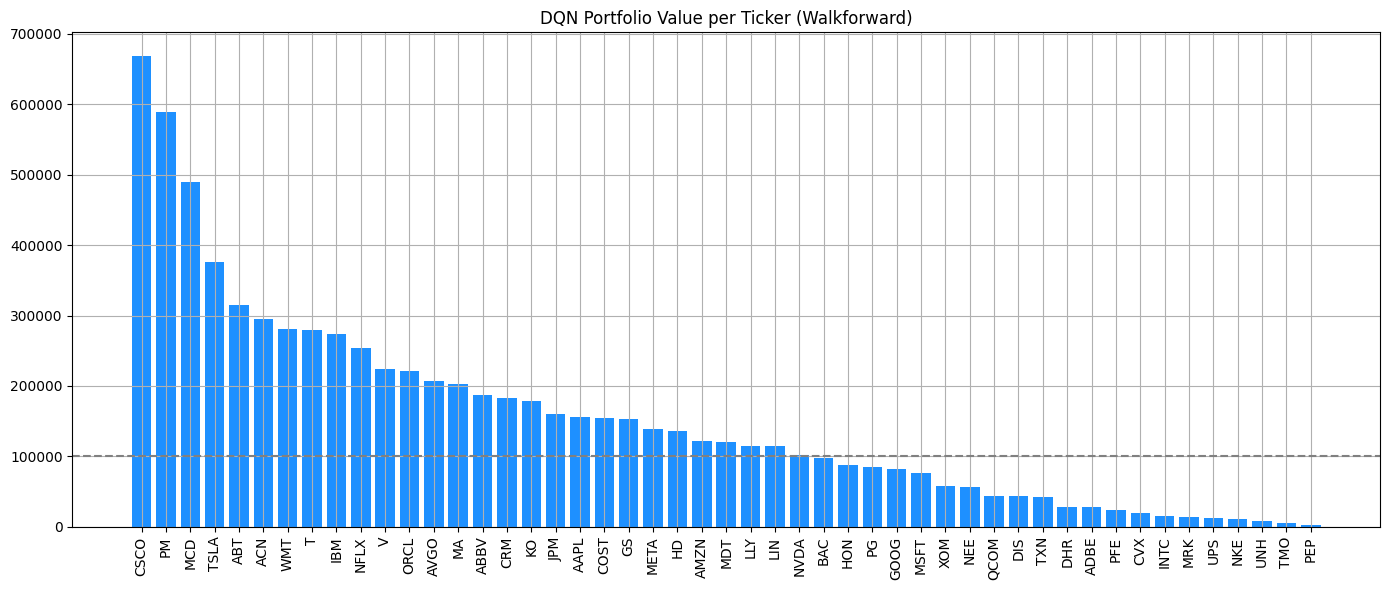

In [23]:
# === Imports ===
import os, gc, random
import numpy as np
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# === Config ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

TICKERS = [
    "AAPL", "TSLA", "MSFT", "GOOG", "AMZN", "NVDA", "META", "JPM", "BAC", "WMT",
    "UNH", "V", "PG", "HD", "MA", "DIS", "PEP", "KO", "CSCO", "ADBE", "CRM", "NFLX",
    "PFE", "MRK", "T", "ORCL", "ABBV", "CVX", "XOM", "ABT", "COST", "QCOM", "INTC",
    "MCD", "NKE", "DHR", "LLY", "MDT", "TMO", "TXN", "PM", "AVGO", "NEE", "ACN", "UPS",
    "HON", "LIN", "GS", "IBM"
]
SEQUENCE_LENGTH = 60
SAVE_DIR = "./dqn_walkforward_models"
os.makedirs(SAVE_DIR, exist_ok=True)

RESULTS_DIR = "/content/drive/MyDrive/Results_May_2025/results_dqn_walkforward"
os.makedirs(RESULTS_DIR, exist_ok=True)

train_start = "2023-06-01"
train_end = "2024-06-01"
test_start = "2024-06-01"
test_end = "2025-04-28"

# === Feature Engineering ===
def compute_technical_indicators(df):
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))
    df.dropna(inplace=True)
    return df

# === Q-Network ===
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim * SEQUENCE_LENGTH, 256), nn.ReLU(),
            nn.Linear(256, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# === Agent ===
class DQNAgent:
    def __init__(self, input_dim, output_dim, lr=1e-4, gamma=0.99):
        self.model = QNetwork(input_dim, output_dim).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()
        self.gamma = gamma

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return random.randint(0, 2)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def update(self, state, action, reward, next_state, done):
        q_values = self.model(state)
        next_q_values = self.model(next_state)
        target = reward + self.gamma * torch.max(next_q_values) * (1 - int(done))
        loss = self.criterion(q_values[0, action], target.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# === Train & Evaluate ===
def train_and_evaluate(ticker):
    print(f"\nTraining {ticker}")
    df = yf.download(ticker, start=train_start, end=test_end, interval="1h", progress=False)
    if df.empty:
        print("No data.")
        return None

    df = compute_technical_indicators(df)
    features = ['Close', 'EMA_10', 'EMA_50', 'MACD_Line', 'MACD_Signal', 'RSI']
    scaled = MinMaxScaler().fit_transform(df[features])
    df_scaled = pd.DataFrame(scaled, index=df.index, columns=features)

    sequences = [(df_scaled.index[i], df_scaled.iloc[i - SEQUENCE_LENGTH:i].values)
                 for i in range(SEQUENCE_LENGTH, len(df_scaled))]

    train_X = np.array([x[1] for x in sequences if train_start <= x[0].strftime('%Y-%m-%d') < train_end])
    test_X = np.array([x[1] for x in sequences if test_start <= x[0].strftime('%Y-%m-%d') < test_end])

    if len(train_X) < 10 or len(test_X) < 10:
        print("Insufficient data.")
        return None

    agent = DQNAgent(train_X.shape[2], 3)
    for ep in range(5):
        idx = random.randint(0, len(train_X) - 2)
        state = torch.tensor(train_X[idx][None], dtype=torch.float32).to(device)
        for t in range(idx, len(train_X) - 1):
            next_state = torch.tensor(train_X[t+1][None], dtype=torch.float32).to(device)
            reward = float(train_X[t+1, -1, 0] - train_X[t, -1, 0])
            done = t + 2 == len(train_X)
            action = agent.select_action(state, epsilon=1.0 - ep / 5)
            agent.update(state, action, reward, next_state, done)
            state = next_state
            if done: break

    returns, actions, labels = [], [], []
    for t in range(len(test_X) - 1):
        state = torch.tensor(test_X[t][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=0.0)
        actions.append(action)

        current_price = test_X[t, -1, 0]
        next_price = test_X[t+1, -1, 0]
        pct_return = (next_price - current_price) / (current_price + 1e-6)
        returns.append(pct_return)

        if next_price > current_price:
            labels.append(2)
        elif next_price < current_price:
            labels.append(0)
        else:
            labels.append(1)

    test_returns = np.array(returns)
    cumulative = np.cumprod(1 + test_returns)
    final_value = 100000 * cumulative[-1]
    return_pct = cumulative[-1] - 1
    sharpe = test_returns.mean() / (test_returns.std() + 1e-6) * np.sqrt(252)
    drawdown = np.max(np.maximum.accumulate(cumulative) - cumulative)
    accuracy = np.mean(np.array(actions) == np.array(labels))

    model_path = f"{SAVE_DIR}/dqn_{ticker}_{train_start}_to_{test_end}.pth"
    torch.save(agent.model.state_dict(), model_path)
    print(f"Saved model: {model_path} | Return: {return_pct:.2%}")

    return {
        "Ticker": ticker,
        "Sharpe": round(sharpe, 4),
        "Accuracy": round(accuracy, 4),
        "Drawdown": round(drawdown, 4),
        "Return": round(return_pct * 100, 2),
        "Final_Portfolio": round(final_value, 2),
    }

# === Run All ===
results = []
for ticker in TICKERS:
    metrics = train_and_evaluate(ticker)
    if metrics:
        results.append(metrics)
    gc.collect()
    torch.cuda.empty_cache()

# === Save Results ===
df = pd.DataFrame(results)
df.to_csv(f"{RESULTS_DIR}/dqn_model_selection.csv", index=False)
df_sorted = df.sort_values("Final_Portfolio", ascending=False)
df_sorted.to_csv(f"{RESULTS_DIR}/dqn_portfolio_summary.csv", index=False)

print("\n\U0001f3c6 Top 5 by Portfolio Value:")
print(df_sorted.head())

print("\n Bottom 5 by Portfolio Value:")
print(df_sorted.tail())

plt.figure(figsize=(14, 6))
plt.bar(df_sorted["Ticker"], df_sorted["Final_Portfolio"], color='dodgerblue')
plt.axhline(100000, linestyle='--', color='gray')
plt.title("DQN Portfolio Value per Ticker (Walkforward)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()


In [21]:
# === Save Results to Google Drive ===
RESULTS_DIR = "/content/drive/MyDrive/Results_May_2025/results_dqn_walkforward"
os.makedirs(RESULTS_DIR, exist_ok=True)  # Ensure the folder exists

df = pd.DataFrame(results)
df_sorted = df.sort_values("Final_Portfolio", ascending=False)

df.to_csv(f"{RESULTS_DIR}/dqn_model_selection.csv", index=False)
df_sorted.to_csv(f"{RESULTS_DIR}/dqn_portfolio_summary.csv", index=False)

print("\n Saved model selector and portfolio summary to Google Drive.")



 Saved model selector and portfolio summary to Google Drive.


In [22]:
!rm -rf /content/drive

rm: cannot remove '/content/drive/.file-revisions-by-id': Operation canceled
rm: cannot remove '/content/drive/.shortcut-targets-by-id': Operation canceled
rm: cannot remove '/content/drive/MyDrive': Operation canceled
rm: cannot remove '/content/drive/.Trash-0': Directory not empty
rm: cannot remove '/content/drive/.Encrypted/.shortcut-targets-by-id': Operation canceled
rm: cannot remove '/content/drive/.Encrypted/MyDrive': Operation canceled
